In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from termcolor import colored as cl 
import itertools
import random

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import time


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# def specificity(y_test, predict_y):
#  tn, fp, fn, tp = confusion_matrix(y_test, predict_y).ravel()
#  s=tn/(tn+fp)
#  return s
#  score1 = make_scorer(specificity, greater_is_better=False)
np.random.seed(10)



In [48]:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/dataset/ds/creditcard.csv')


In [60]:
remove_n = 275299
drop_indices = np.random.choice(df.index,remove_n, replace=False)
df_subset = df.drop(drop_indices)
values= df[ (df['Class'] == 1)]
dataset=df_subset.append(other=values)
dataset = dataset.sample(frac = 1)


In [62]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
238222,149582.0,-4.280584,1.421100,-3.908229,2.942946,-0.076205,-2.002526,-2.874155,-0.856005,0.963674,-3.235439,3.341802,-7.562860,-1.847443,-11.571423,-1.481556,-6.180919,-9.285186,-3.921722,0.685511,-0.198963,-0.140062,-0.907720,-0.680108,-0.349170,0.056276,-1.149923,-1.809886,0.723051,1.10,1
235445,148393.0,2.257125,-1.487231,-0.788434,-1.626205,-1.388520,-0.484561,-1.309927,-0.045722,-1.230185,1.749482,0.283023,-0.537333,-0.261271,-0.186231,-0.731001,-0.182653,0.144075,0.629653,0.225567,-0.456688,-0.133463,0.076276,0.208021,-0.373993,-0.264262,-0.175708,0.012096,-0.060707,18.60,0
24215,33123.0,-0.583880,0.749139,2.489315,0.727643,-0.501264,0.231825,0.077561,0.222471,0.272318,-0.602338,-0.358267,0.580004,0.310034,-0.538042,0.151595,-0.446991,0.137113,-0.506306,-0.526871,-0.118078,0.084302,0.429332,-0.083170,0.403401,-0.162060,-0.454096,0.013724,0.073031,9.99,0
251123,155229.0,-0.380097,0.947642,-0.772336,-0.443717,0.873774,-0.821833,1.007168,-0.211991,0.550825,0.265309,0.751080,-0.574200,-1.617997,-0.706972,0.311639,0.244523,0.057290,1.358522,0.131358,0.234876,0.143695,0.927982,-0.217375,-0.577027,-0.277710,-0.139845,0.437612,0.112958,36.96,0
124427,77281.0,0.657478,-1.285148,0.943871,0.401469,-1.579852,-0.115491,-0.471521,0.171981,1.040693,-0.375914,0.935344,0.855607,-1.017754,-0.105701,-0.886167,0.092820,0.028775,-0.046239,0.602073,0.390129,-0.023686,-0.472047,-0.122505,0.597774,-0.046644,0.888341,-0.091673,0.048901,265.16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91546,63518.0,0.905274,0.080784,1.547836,2.570243,-0.100630,2.017006,-0.840341,0.709949,-0.016073,0.282370,0.391973,0.949713,0.475365,-0.386157,0.701073,-0.766096,0.874924,-2.319315,-2.521562,-0.262425,0.064652,0.504713,0.201644,-0.618860,-0.043392,0.062233,0.117348,0.026562,6.08,0
46129,42648.0,1.181350,-0.559179,0.369252,0.462396,-0.411321,0.667445,-0.531420,0.047032,-0.743940,0.632558,-1.365323,0.501385,1.796559,-0.488333,0.396258,-1.498662,-0.215539,0.956308,-1.072387,-0.305485,-0.358005,-0.482800,-0.157808,-0.961184,0.528067,-0.254456,0.080471,0.036632,84.31,0
202791,134494.0,-0.060135,0.832088,0.664149,-0.561490,1.044491,-0.540045,1.271010,-0.452163,-0.328619,-0.409502,-1.337485,0.022807,0.708579,-0.148464,-0.076929,-0.247611,-0.566867,-0.521969,0.819025,0.066957,-0.289636,-0.562028,-0.187347,-0.628397,-0.390286,0.249422,-0.070092,-0.077364,0.89,0
213160,139135.0,-19.438377,-17.164140,-8.610240,4.073813,0.664572,-0.502303,6.491054,-3.981043,4.666933,5.316694,1.718154,-0.394894,0.601822,-2.370572,1.559224,1.910168,-2.391402,-1.105333,2.011332,-12.070717,-4.508257,1.132565,0.013644,0.459717,1.182505,0.161029,-9.543518,15.870474,0.76,0


In [81]:
X = dataset.drop('Class', axis = 1).values
Y = dataset['Class'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print('X_train:',X_train)

print('Y_train',Y_train)

print('X_test',X_test)
 
print('Y_test',Y_test)

X_train: [[ 1.69527000e+05 -1.78525270e+00 -5.93335043e+00 ... -3.37630446e-01
   3.05663404e-01  1.89099000e+03]
 [ 5.42200000e+03  4.58939878e-01  1.06806648e+00 ...  4.15350430e-01
   4.19593215e-01  1.00000000e+00]
 [ 6.68960000e+04 -3.02386277e-01  9.46516593e-01 ...  3.15104366e-02
   1.58674146e-02  1.00000000e+01]
 ...
 [ 4.42520000e+04 -8.41648801e-01  1.03449011e+00 ... -1.33467945e-01
   9.05193001e-02  0.00000000e+00]
 [ 6.45440000e+04 -1.14532144e+00 -4.59388448e+00 ... -2.20871251e-01
   2.14450329e-01  1.27445000e+03]
 [ 1.58773000e+05  2.16184605e+00 -7.15797033e-01 ... -9.30542128e-02
  -7.25889685e-02  9.90000000e+01]]
Y_train [0 0 0 ... 0 0 0]
X_test [[ 4.12660000e+04 -1.21859281e-01  1.82200787e-01 ...  7.47573536e-02
   7.73891420e-02  1.20000000e+01]
 [ 1.17294000e+05  1.95649016e+00 -4.93474612e-01 ... -4.19398028e-02
  -5.89967019e-02  6.00000000e+01]
 [ 5.51240000e+04 -2.41720349e+00  1.54571445e-01 ... -3.07413738e-01
  -3.80688974e-01  9.93500000e+01]
 ...
 [

In [82]:

lr= LogisticRegression(max_iter=100,C=0.1,penalty='l2',n_jobs=-1,class_weight='balanced')
lr.fit(X_train, Y_train)
lr_prid=lr.predict(X_test) 

# print('accuracy score:',accuracy_score(Y_test, lr_prid))

# print('F1 score:',f1_score(Y_test, lr_prid))



In [ ]:
start_time = time.time()
svm = SVC()
svm.fit(X_train, Y_train)
svm_predict = svm.predict(X_test)
end_time = time.time()


print('accuracy score:',accuracy_score(Y_test,svm_predict))

print('F1 score:',f1_score(Y_test,svm_predict))

print('training time:',end_time-start_time)

In [83]:
def plot_confusion_matrix(Y_test, predict_y):
 C = confusion_matrix(Y_test, predict_y)
 A =(((C.T)/(C.sum(axis=1))).T)
 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))
 labels = [1,2]
 cmap=sns.dark_palette("green")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")
 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")
 plt.subplot(1, 3, 3)
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")
 plt.show()

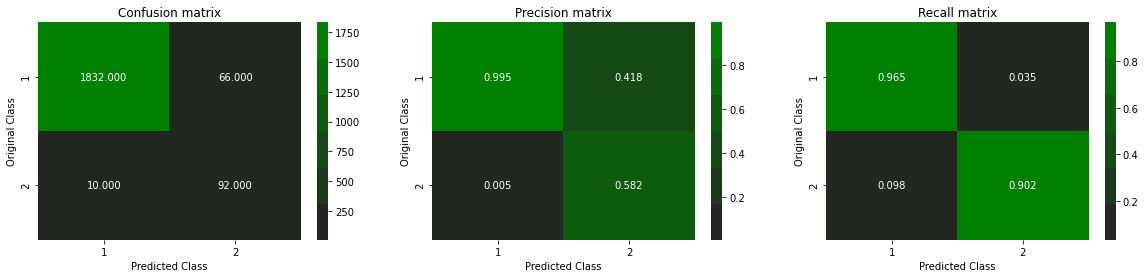

In [84]:
plot_confusion_matrix(Y_test,lr_prid)


In [85]:
tp,fp,fn,tn = confusion_matrix(Y_test,lr_prid).ravel()
print(tp,fp,fn,tn)


1832 66 10 92


In [86]:
 def specificity(y_test, predict_y):
  tn, fp, fn, tp = confusion_matrix(y_test, predict_y).ravel()
  s=tn/(tn+fp)
  return s
  
  

In [87]:
lr.score(X_test,Y_test)

0.962

In [79]:


print(classification_report(Y_test,lr_prid))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1900
           1       0.64      0.93      0.76       100

    accuracy                           0.97      2000
   macro avg       0.82      0.95      0.87      2000
weighted avg       0.98      0.97      0.97      2000

